In [26]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',200)

In [5]:
articles=[]
for i in os.listdir('bbc_sports_articles/'):
    file=open('bbc_sports_articles/'+i,encoding='utf-8',mode='rt')
    articles.append(file.read())
    file.close()    

In [6]:
len(articles)

471

In [8]:
articles[0]

'Wilkinson targets Ireland\n\nJonny Wilkinson says he is "massively positive" about his chances of playing some part in the Six Nations.\n\nA knee injury has ruled him out of England\'s first two matches against Wales and France, but he is hoping to feature against Ireland on 27 February. "I\'m coming on really well. The physios at England and Newcastle are as happy as they could possibly be at this point." said the England fly-half. Wilkinson has not played for England since their 2003 World Cup final win. "The injury is to my left leg so, as a kicker, I need to make sure I\'m really right so I can play my usual game."\n\n"All I can do is try to get back. It (the knee injury) happened two and a half weeks ago and the limit was then set of six to eight weeks, which is the second half of the Six Nations." "I\'m just concentrating on doing my bit, which is the rehab. "All I can do is free myself up for selection and then see what people want to do with me, whether they want to play me or

In [10]:
clean_articles=[]
for i in articles:
    clean_articles.append(i.replace('\n',' ').replace("\'",' '))

In [11]:
clean_articles[0]

'Wilkinson targets Ireland  Jonny Wilkinson says he is "massively positive" about his chances of playing some part in the Six Nations.  A knee injury has ruled him out of England s first two matches against Wales and France, but he is hoping to feature against Ireland on 27 February. "I m coming on really well. The physios at England and Newcastle are as happy as they could possibly be at this point." said the England fly-half. Wilkinson has not played for England since their 2003 World Cup final win. "The injury is to my left leg so, as a kicker, I need to make sure I m really right so I can play my usual game."  "All I can do is try to get back. It (the knee injury) happened two and a half weeks ago and the limit was then set of six to eight weeks, which is the second half of the Six Nations." "I m just concentrating on doing my bit, which is the rehab. "All I can do is free myself up for selection and then see what people want to do with me, whether they want to play me or leave it.

In [12]:
clean_articles=[re.sub('[^a-zA-Z]',' ',x) for x in clean_articles]
clean_articles[0]

'Wilkinson targets Ireland  Jonny Wilkinson says he is  massively positive  about his chances of playing some part in the Six Nations   A knee injury has ruled him out of England s first two matches against Wales and France  but he is hoping to feature against Ireland on    February   I m coming on really well  The physios at England and Newcastle are as happy as they could possibly be at this point   said the England fly half  Wilkinson has not played for England since their      World Cup final win   The injury is to my left leg so  as a kicker  I need to make sure I m really right so I can play my usual game     All I can do is try to get back  It  the knee injury  happened two and a half weeks ago and the limit was then set of six to eight weeks  which is the second half of the Six Nations    I m just concentrating on doing my bit  which is the rehab   All I can do is free myself up for selection and then see what people want to do with me  whether they want to play me or leave it 

In [13]:
clean_articles=[' '.join([w for w in x.split() if len(w)>1])for x in clean_articles]

In [14]:
clean_articles[0]

'Wilkinson targets Ireland Jonny Wilkinson says he is massively positive about his chances of playing some part in the Six Nations knee injury has ruled him out of England first two matches against Wales and France but he is hoping to feature against Ireland on February coming on really well The physios at England and Newcastle are as happy as they could possibly be at this point said the England fly half Wilkinson has not played for England since their World Cup final win The injury is to my left leg so as kicker need to make sure really right so can play my usual game All can do is try to get back It the knee injury happened two and half weeks ago and the limit was then set of six to eight weeks which is the second half of the Six Nations just concentrating on doing my bit which is the rehab All can do is free myself up for selection and then see what people want to do with me whether they want to play me or leave it If he does not recover in time for England Six Nations season his n

In [15]:
clean_articles=[x.lower() for x in clean_articles]
clean_articles[0]

'wilkinson targets ireland jonny wilkinson says he is massively positive about his chances of playing some part in the six nations knee injury has ruled him out of england first two matches against wales and france but he is hoping to feature against ireland on february coming on really well the physios at england and newcastle are as happy as they could possibly be at this point said the england fly half wilkinson has not played for england since their world cup final win the injury is to my left leg so as kicker need to make sure really right so can play my usual game all can do is try to get back it the knee injury happened two and half weeks ago and the limit was then set of six to eight weeks which is the second half of the six nations just concentrating on doing my bit which is the rehab all can do is free myself up for selection and then see what people want to do with me whether they want to play me or leave it if he does not recover in time for england six nations season his n

In [27]:
def freq_words(x,terms=30):
    combine_articles=' '.join([text for text in x])
    all_words=combine_articles.split()
    fdist=nltk.FreqDist(all_words)
    words_df=pd.DataFrame({'words':list(fdist.keys()),'count':list(fdist.values())})
    df=words_df.sort_values(ascending=False,by='count')[:30]
    plt.figure(figsize=(20,5))
    sns.barplot(x='words',y='count',data=df)
    plt.show()

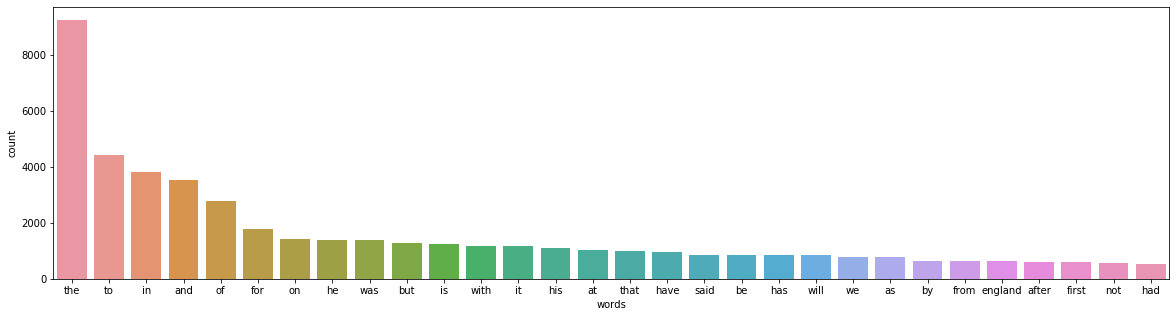

In [28]:
freq_words(clean_articles)

In [29]:
nlp=spacy.load('en_core_web_sm')

In [30]:
clean_articles=[' '.join(token.lemma_ for token in nlp(x)) for x in clean_articles]

In [31]:
clean_articles=[' '.join([w for w in x.split() if nlp.vocab[w].is_stop==False])for x in clean_articles ]

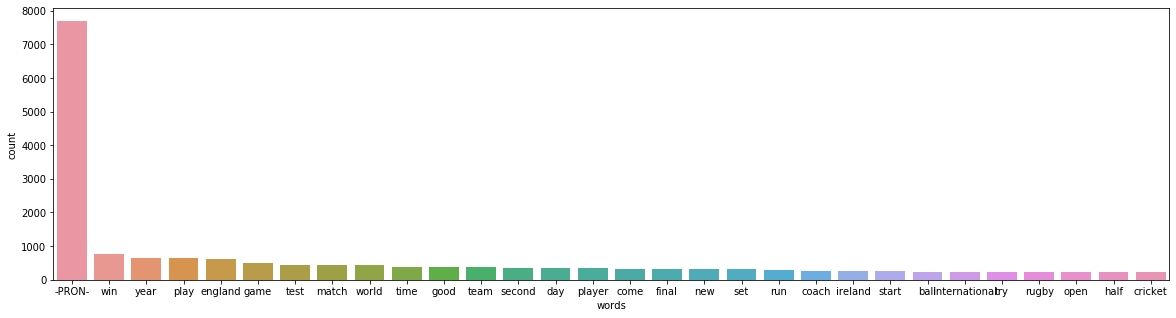

In [32]:
freq_words(clean_articles)

In [33]:
clean_articles=[re.sub('-PRON-','',i) for i in clean_articles]

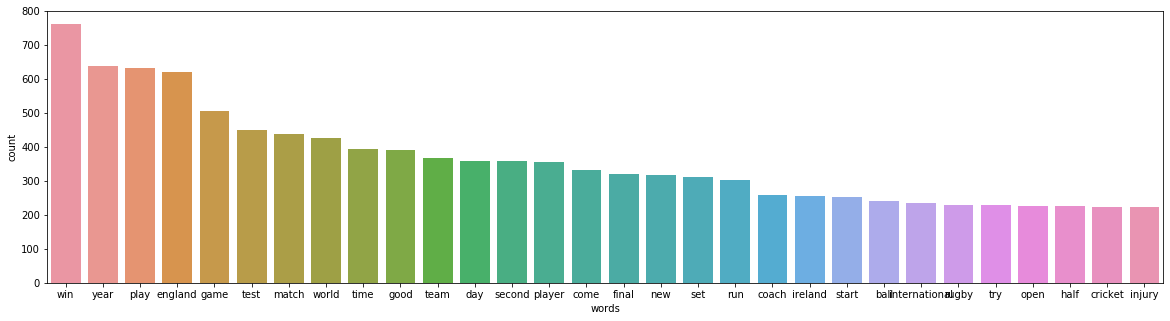

In [34]:
freq_words(clean_articles)